# **Project Title: Brain Tumor Classification (MRI)**


## **Introduction**
The goal of this project is to perform classification on brain tumor dataset using MRI images. The chosen dataset is organized into classes such as glioma_tumor, meningioma_tumor, no_tumor, and pituitary_tumor. The project involves building a classification model and incorporating feature visualization techniques.

In [1]:
from google.colab import drive

drive.mount('/content/drive')

%cd '/content/drive/MyDrive/Brain Tumor Classification'

%ls

Mounted at /content/drive
/content/drive/MyDrive/Brain Tumor Classification
Testing/  Training/


# **Data Preprocessing and Cleaning**



In [2]:
import os
import cv2
import numpy as np
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical
from sklearn.metrics import confusion_matrix
import seaborn as sns
import gc
from tensorflow.keras import backend as K
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
!pip install minisom
from minisom import MiniSom

dataset_path = "/content/drive/MyDrive/Brain Tumor Classification"

def load_and_preprocess_data(dataset_path, img_size=(96, 96)):
    data = []
    labels = []

    for class_name in os.listdir(dataset_path):
        class_path = os.path.join(dataset_path, class_name)

        if not os.path.isdir(class_path):
            continue

        for image_name in os.listdir(class_path):
            image_path = os.path.join(class_path, image_name)

            if os.path.isfile(image_path):
                img = cv2.imread(image_path)

                if img is None:
                    print(f"Error loading image: {image_path}")
                    continue

                # Convert the image to RGB format
                img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

                # Resize the image to a consistent size
                img = cv2.resize(img, img_size)

                # Normalize pixel values to be between 0 and 1
                img = img / 255.0

                data.append(img)
                labels.append(class_name)

            else:
                print(f"Skipping non-file path: {image_path}")
    return np.array(data), np.array(labels)

train_Data, train_Labels = load_and_preprocess_data(os.path.join(dataset_path, "Training"))



  Preparing metadata (setup.py) ... done
  Created wheel for minisom: filename=MiniSom-2.3.2-py3-none-any.whl size=10650 sha256=b4a153cafd03165258ff71aca649dc206639d7da9290b077b06c955e54581c0b
  Stored in directory: /root/.cache/pip/wheels/b4/f6/8a/9daf8831901c3e3805775633404248f10663d1c80b7e5a1314
Successfully built minisom


#### **One-Hot Encoding of Class Labels:**

Before splitting the data, the class labels are converted to one-hot encoding. This is a common practice in machine learning classification tasks to represent categorical variables in a format suitable for model training. The following code accomplishes this task:

In [3]:
# Convert class labels to one-hot encoding
label_mapping = {label: i for i, label in enumerate(np.unique(train_Labels))}

print(label_mapping)

train_labels_encoded = np.array([label_mapping[label] for label in train_Labels])

train_labels_one_hot = to_categorical(train_labels_encoded)


{'glioma_tumor': 0, 'meningioma_tumor': 1, 'no_tumor': 2, 'pituitary_tumor': 3}


#### **Data Splitting into Training and Validation Sets:**



In [4]:
# Split the training data into training and validation sets
train_data, val_data, train_labels, val_labels = train_test_split(train_Data, train_labels_one_hot, test_size=0.2, random_state=42)

print("Training data shape:", train_data.shape)
print("Validation data shape:", val_data.shape)

Training data shape: (2306, 96, 96, 3)
Validation data shape: (577, 96, 96, 3)


### **Testing Data Preparation:**



In [5]:
test_data, test_labels = load_and_preprocess_data(os.path.join(dataset_path, "Testing"))


test_labels_encoded = np.array([label_mapping[label] for label in test_labels])
test_labels_one_hot = to_categorical(test_labels_encoded)

print("Testing data shape:", test_data.shape)

gc.collect()
K.clear_session()

Testing data shape: (394, 96, 96, 3)


## **Exploratory Data Analysis (EDA):**

This phase of the project involves conducting Exploratory Data Analysis (EDA) to gain insights into the brain tumor image dataset. The code provided utilizes various visualization techniques to understand key characteristics and distributions within the dataset.

### **Class Distribution Visualization of Training Data:**


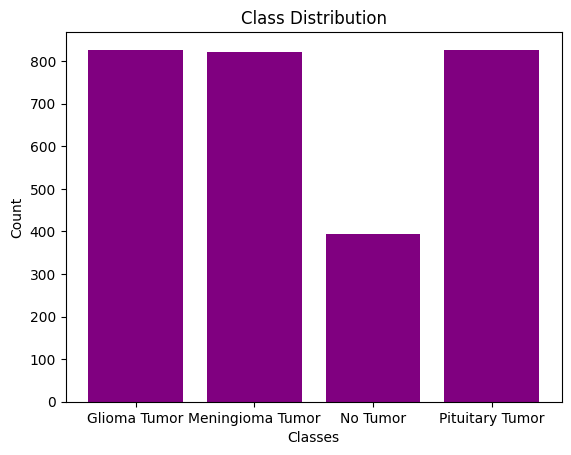

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

def visualize_class_distribution(labels, class_mapping):

    labels_str = [str(label) for label in labels]
    unique_labels, counts = np.unique(labels_str, return_counts=True)

    class_names = [class_mapping[label] for label in unique_labels]

    plt.bar(class_names, counts, color="purple")
    plt.title('Class Distribution')
    plt.xlabel('Classes')
    plt.ylabel('Count')
    plt.show()

class_mapping = {'glioma_tumor': 'Glioma Tumor', 'meningioma_tumor': 'Meningioma Tumor', 'no_tumor': 'No Tumor', 'pituitary_tumor': 'Pituitary Tumor'}

visualize_class_distribution(train_Labels, class_mapping)

gc.collect()
K.clear_session()

#### **Observation:**
The bar chart provides insights into the distribution of samples across different classes. From graph we can see that the glioma, meningioma and pituitary tumor classes have around 800 images and No Tumor class has 400 images.

#### **Sample Image Visualization of Training Data:**


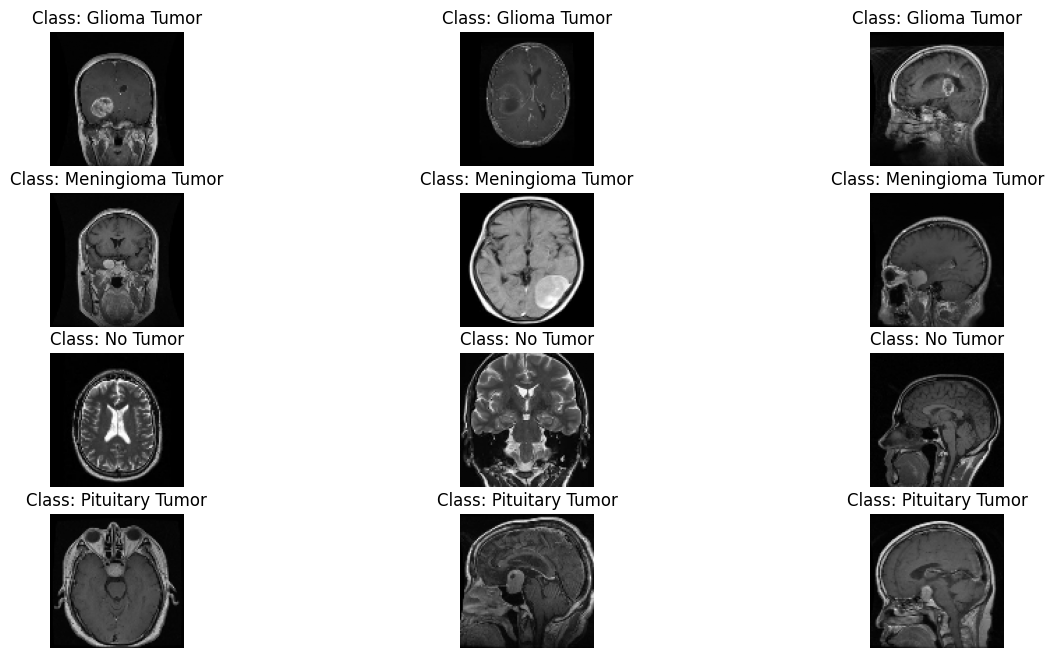

In [ ]:
def visualize_sample_images(data, labels, class_mapping, num_samples=3):
    unique_labels = np.unique(labels)

    plt.figure(figsize=(15, 8))

    for i, label in enumerate(unique_labels):
        label_indices = np.where(labels == label)[0]

        if len(label_indices) < num_samples:

            sample_indices = label_indices
        else:

            sample_indices = np.random.choice(label_indices, num_samples, replace=False)

        for j, sample_index in enumerate(sample_indices):
            plt.subplot(len(unique_labels), num_samples, i * num_samples + j + 1)
            plt.imshow(data[sample_index])
            plt.title(f"Class: {class_mapping[str(label)]}")
            plt.axis('off')

    plt.show()
visualize_sample_images(train_Data, train_Labels, class_mapping)


#### **Pixel Value Distribution for Training Data**



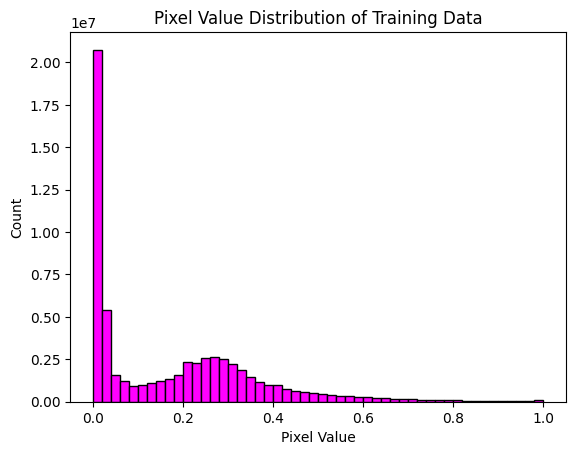

In [ ]:
def visualize_pixel_distribution(data):
    pixel_values = data.flatten()

    plt.hist(pixel_values, bins=50, edgecolor='black', color='magenta')
    plt.title('Pixel Value Distribution of Training Data')
    plt.xlabel('Pixel Value')
    plt.ylabel('Count')
    plt.show()

visualize_pixel_distribution(train_data)


#### **Observation**

The distribution provides insights into the spread and concentration of pixel values. Peaks and patterns in the histogram indicate regions of high or low pixel density. The peak at 0.0 indicate high pixel density and from 0.8-1.0 there is low pixel density. As the normalization is applied in preprocessing step, the pixels values of training data range from 0-1.

#### **Image Size Distribution Visualization:**


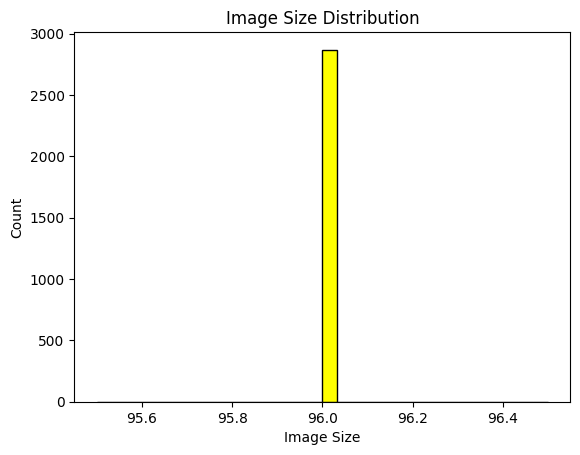

In [ ]:
# Visualize image size distribution
def visualize_image_size_distribution(data):
    sizes = np.array([img.shape[0] for img in data])

    plt.hist(sizes, bins=30,color="yellow" ,edgecolor='black')
    plt.title('Image Size Distribution')
    plt.xlabel('Image Size')
    plt.ylabel('Count')
    plt.show()

visualize_image_size_distribution(train_Data)

#### **Observation:**

The histogram provides insights into the distribution of image sizes.
As in preprocessing step all training images have been resized to 96 X 96, the graph shows that all training samples have been successfully resized to a consistent size.

## **Feature Visualization:**

In this section of the project, we explore feature visualization techniques to gain insights into the distribution of brain tumor data in reduced dimensions. We employ Principal Component Analysis (PCA) for preliminary dimensionality reduction, followed by t-distributed Stochastic Neighbor Embedding (t-SNE) for visualization.



## **1. PCA (Principal Component Analysis):**

The code uses Principal Component Analysis (PCA) to reduce data dimensionality, preserving variance with 50 components. This hyperparameter balances information retention and computational efficiency. The choice impacts model performance, as greater components lead to overfitting of model.It can be tuned based on evaluation metrics like accuracy.

## **2. t-SNE (t-Distributed Stochastic Neighbor Embedding):**

The code applies t-SNE to the PCA-transformed features and generates a scatter plot.The t-SNE visualizations aim to provide insights into how well the features capture the underlying patterns in the training and validation sets.

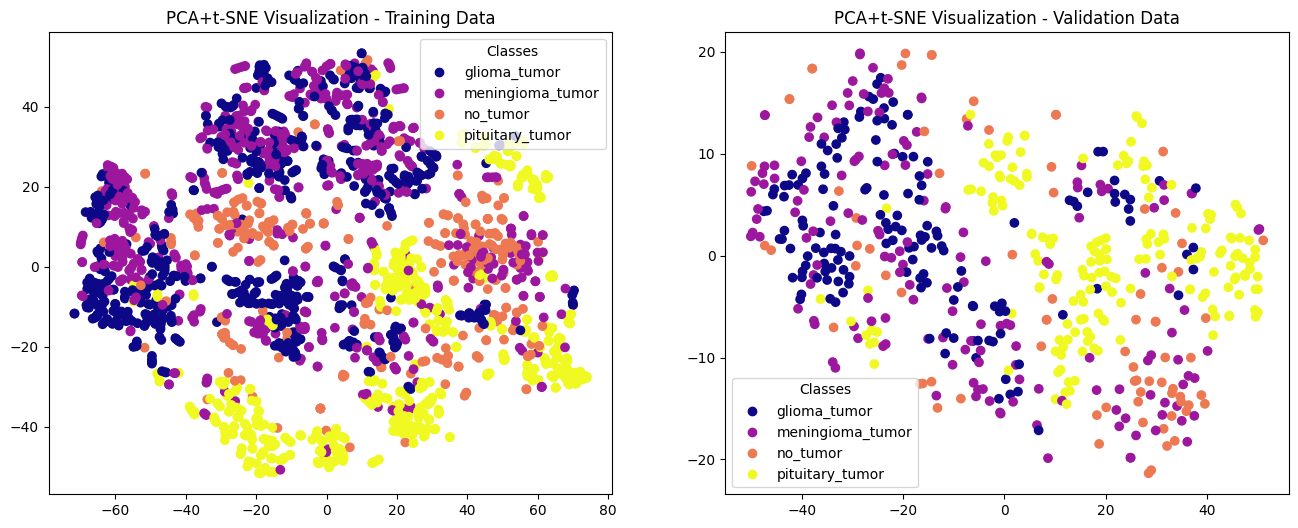

In [ ]:
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

flat_train_data = train_data.reshape((train_data.shape[0], -1))
flat_val_data = val_data.reshape((val_data.shape[0], -1))

pca = PCA(n_components=50)
pca_Result = pca.fit_transform(flat_train_data)
pca_result = pca.fit_transform(flat_val_data)

tsne_train = TSNE(n_components=2, random_state=42)
tsne_train_result = tsne_train.fit_transform(pca_Result)

tsne_val = TSNE(n_components=2, random_state=42)
tsne_val_result = tsne_val.fit_transform(pca_result)

plt.figure(figsize=(16, 6))

plt.subplot(1, 2, 1)
scatter_train = plt.scatter(tsne_train_result[:, 0], tsne_train_result[:, 1], c=np.argmax(train_labels, axis=1), cmap='plasma')  # Change cmap to 'plasma' or another bright colormap
plt.title('PCA+t-SNE Visualization - Training Data')
plt.legend(handles=scatter_train.legend_elements()[0], title='Classes', labels=label_mapping.keys())

plt.subplot(1, 2, 2)
scatter_val = plt.scatter(tsne_val_result[:, 0], tsne_val_result[:, 1], c=np.argmax(val_labels, axis=1), cmap='plasma')  # Change cmap to 'plasma' or another bright colormap
plt.title('PCA+t-SNE Visualization - Validation Data')
plt.legend(handles=scatter_val.legend_elements()[0], title='Classes', labels=label_mapping.keys())

plt.show()


The t-SNE visualization of PCA features provides insights into the distribution of data points in a reduced-dimensional space. The positions of points on the scatter plot reflect their similarity, with points belonging to the same class expected to cluster together.

### **Observations:**

**Cluster Separation:**

Points in the scatter plots show distinguishable clusters, indicating that the selected features capture meaningful information.
Class separation is observable, suggesting that the reduced-dimensional features contribute to the discriminative power of the model.

**Compactness and Spread:**

The compactness of clusters in the visualization implies that the selected features are effective in capturing the intrinsic structure of the data.
Spread within clusters may indicate the diversity within each class, providing insights into the variability of tumor images.

**Color Choice Impact:**

The use of bright and contrasting colors enhances the visual appeal and makes it easier to differentiate between classes.
Class labels in the legend further improve interpretability.

##**3. Convolutional Neural Network(CNN):**



#### **Model Architecture:**
The chosen model is a Convolutional Neural Network (CNN), specifically designed for image classification tasks. The architecture included multiple convolutional layers with increasing depth, interspersed with max-pooling layers for feature extraction, and dense layers at the end for classification.
#### **Rationale(Why CNN is Selected):**
* **Image Data:** CNNs are specifically designed for image data. They can effectively capture spatial hierarchies and patterns due to their convolutional layers.
* **High-Dimensional Input:** Images are high-dimensional data. CNNs can reduce the number of parameters through weight sharing and pooling, making them more efficient for such data.



In [ ]:
import tensorflow as tf
from tensorflow.keras import layers, models
from sklearn.metrics import classification_report, accuracy_score

def build_model(input_shape, num_classes):
    model = models.Sequential([
        layers.Conv2D(32, (3, 3), activation='relu', input_shape=input_shape),
        layers.MaxPooling2D((2, 2)),
        layers.Conv2D(64, (3, 3), activation='relu'),
        layers.MaxPooling2D((2, 2)),
        layers.Conv2D(128, (3, 3), activation='relu'),
        layers.MaxPooling2D((2, 2)),
        layers.Flatten(),
        layers.Dense(128, activation='relu'),
        layers.Dense(num_classes, activation='softmax')
    ])
    return model
input_shape = train_data.shape[1:]
num_classes = len(np.unique(train_labels_encoded))

cnn_model = build_model(input_shape, num_classes)
cnn_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

##**Training and Testing**
We'll train the model on the training set and evaluate it on the testing set. The metrics used will be accuracy, precision, recall, and F1 score. This step provides valuable insights into the model's learning dynamics and its ability to generalize. It also highlights areas where the model excels and where improvements are needed, guiding further model refinement and iteration. The varied performance across different classes, in particular, can inform targeted improvements in data preprocessing, model architecture, or training strategy.



Epoch 1/10
72/72 [==============================] - 7s 26ms/step - loss: 1.0619 - accuracy: 0.5505 - val_loss: 0.7700 - val_accuracy: 0.6568
Epoch 2/10
72/72 [==============================] - 1s 13ms/step - loss: 0.7162 - accuracy: 0.6982 - val_loss: 0.7060 - val_accuracy: 0.6899
Epoch 3/10
72/72 [==============================] - 1s 12ms/step - loss: 0.5419 - accuracy: 0.7757 - val_loss: 0.5411 - val_accuracy: 0.7596
Epoch 4/10
72/72 [==============================] - 1s 12ms/step - loss: 0.4247 - accuracy: 0.8301 - val_loss: 0.4921 - val_accuracy: 0.8014
Epoch 5/10
72/72 [==============================] - 1s 12ms/step - loss: 0.3338 - accuracy: 0.8785 - val_loss: 0.4565 - val_accuracy: 0.8362
Epoch 6/10
72/72 [==============================] - 1s 13ms/step - loss: 0.2318 - accuracy: 0.9129 - val_loss: 0.4336 - val_accuracy: 0.8502
Epoch 7/10
72/72 [==============================] - 1s 13ms/step - loss: 0.1597 - accuracy: 0.9482 - val_loss: 0.3801 - val_accuracy: 0.8746
Epoch 8/10
72

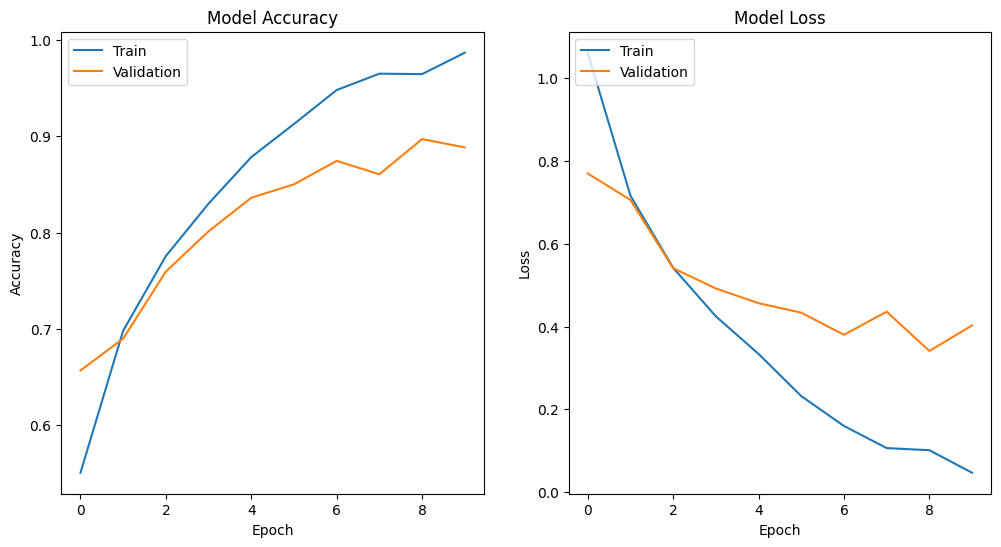

13/13 [==============================] - 0s 23ms/step - loss: 3.4906 - accuracy: 0.7081
Test Accuracy: 0.7081218361854553
13/13 [==============================] - 0s 4ms/step
              precision    recall  f1-score   support

           0       0.90      0.19      0.31       100
           1       0.68      0.89      0.77       115
           2       0.65      0.93      0.77       105
           3       0.81      0.81      0.81        74

    accuracy                           0.71       394
   macro avg       0.76      0.71      0.67       394
weighted avg       0.76      0.71      0.66       394



In [ ]:
history= cnn_model.fit(train_data, train_labels, epochs=10, validation_data=(val_data, val_labels))

def plot_training_history(history):
    plt.figure(figsize=(12, 6))
    plt.subplot(1, 2, 1)
    plt.plot(history.history['accuracy'])
    plt.plot(history.history['val_accuracy'])
    plt.title('Model Accuracy')
    plt.ylabel('Accuracy')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Validation'], loc='upper left')

    plt.subplot(1, 2, 2)
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title('Model Loss')
    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Validation'], loc='upper left')
    plt.show()

plot_training_history(history)
test_loss, test_acc = cnn_model.evaluate(test_data, test_labels_one_hot)
print(f"Test Accuracy: {test_acc}")

predicted_labels = cnn_model.predict(test_data)
predicted_labels = np.argmax(predicted_labels, axis=1)
test_labels_decoded = np.argmax(test_labels_one_hot, axis=1)

print(classification_report(test_labels_decoded, predicted_labels))




### **Observations:**
#### **Training Accuracy and Loss:**
*  The training accuracy significantly improves from 52.92% to 99% over 10 epochs. The training loss decreases from 1.0429 to 0.0307.

#### **Validation Accuracy and Loss:**
* The validation accuracy starts at 68.99% and reaches up to 91.11%, which is a good sign that the model generalizes well to unseen data. However, there's a slight increase in the validation loss in later epochs, which might suggest the model is beginning to overfit.

#### **Testing Results:**
* The test accuracy is 73.86%, which is lower than the highest validation accuracy. This drop indicates that the model may not perform as well on entirely unseen data, a sign of overfitting to the training data.




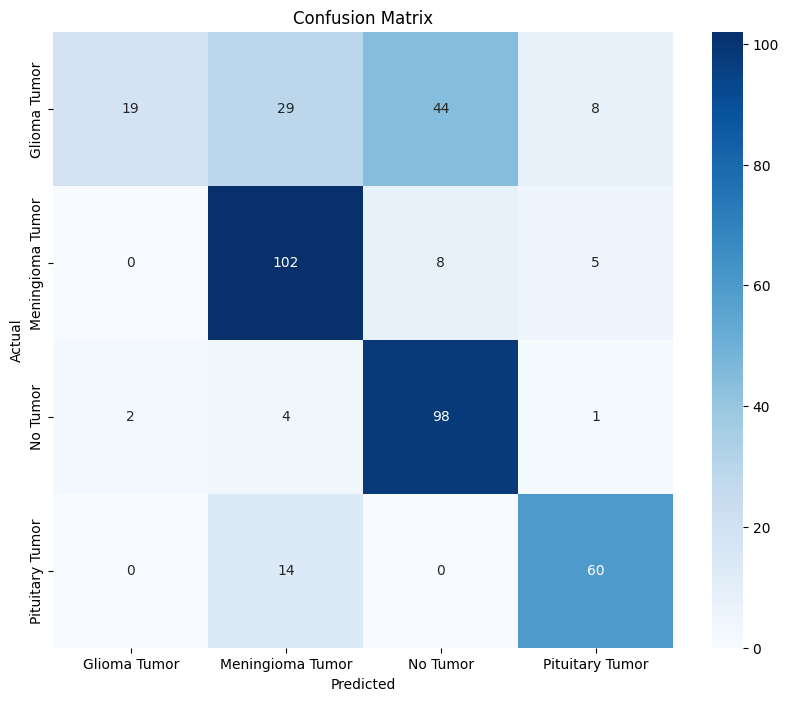

In [ ]:
def plot_confusion_matrix(true_labels, predictions, class_names):
    matrix = confusion_matrix(true_labels, predictions)
    plt.figure(figsize=(10, 8))
    sns.heatmap(matrix, annot=True, fmt='d', cmap='Blues', xticklabels=class_names, yticklabels=class_names)
    plt.title('Confusion Matrix')
    plt.ylabel('Actual')
    plt.xlabel('Predicted')
    plt.show()


class_names = list(class_mapping.values())
plot_confusion_matrix(test_labels_decoded, predicted_labels, class_names)

gc.collect()
K.clear_session()

####**Insights from the Confusion Matrix**
* The model is most accurate with the Meningioma and No Tumor classes.
* There is some confusion between the Glioma and Pituitary tumors, which could be due to similar features or insufficiently distinguishable patterns learned by the model.
* The high number of true positives in the No Tumor class suggests the model is very effective at identifying the absence of abnormalities.

##**Feature Importance Visualization:**

CNNs don't offer direct feature importance in the same way as, say, tree-based models. Instead, we often use visualization techniques like Class Activation Maps (CAM) to understand which parts of the image are most influential in the model's decisions.

CAM is used to create visual overlays on the MRI images, highlighting the regions most influential for the model's predictions.
This technique is particularly suited for CNNs as it helps in pinpointing the exact areas within the images that trigger certain classifications.


In [ ]:
def build_model_for_cam(input_shape, num_classes):
    model = models.Sequential([
        layers.Conv2D(32, (3, 3), activation='relu', input_shape=input_shape),
        layers.MaxPooling2D((2, 2)),
        layers.Conv2D(64, (3, 3), activation='relu'),
        layers.MaxPooling2D((2, 2)),
        layers.Conv2D(128, (3, 3), activation='relu'),
        layers.MaxPooling2D((2, 2)),
        layers.GlobalAveragePooling2D(),  # Global Average Pooling layer for CAM
        layers.Dense(128, activation='relu'),
        layers.Dense(num_classes, activation='softmax')
    ])
    return model

cam_model = build_model_for_cam(input_shape, num_classes)
cam_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
cam_model.fit(train_data, train_labels, epochs=10, validation_data=(val_data, val_labels))



Epoch 1/10
72/72 [==============================] - 3s 18ms/step - loss: 1.3051 - accuracy: 0.3619 - val_loss: 1.1438 - val_accuracy: 0.5139
Epoch 2/10
72/72 [==============================] - 1s 12ms/step - loss: 1.1301 - accuracy: 0.4939 - val_loss: 1.0908 - val_accuracy: 0.4930
Epoch 3/10
72/72 [==============================] - 1s 14ms/step - loss: 1.0513 - accuracy: 0.5257 - val_loss: 0.9624 - val_accuracy: 0.5714
Epoch 4/10
72/72 [==============================] - 1s 14ms/step - loss: 0.9227 - accuracy: 0.5941 - val_loss: 0.8309 - val_accuracy: 0.6324
Epoch 5/10
72/72 [==============================] - 1s 15ms/step - loss: 0.8003 - accuracy: 0.6481 - val_loss: 0.7697 - val_accuracy: 0.6620
Epoch 6/10
72/72 [==============================] - 1s 15ms/step - loss: 0.7598 - accuracy: 0.6760 - val_loss: 0.7548 - val_accuracy: 0.6951
Epoch 7/10
72/72 [==============================] - 1s 13ms/step - loss: 0.7105 - accuracy: 0.6938 - val_loss: 0.7057 - val_accuracy: 0.7125
Epoch 8/10
72

####**Observation:**
Starting from Epoch 7, while the training accuracy continues to increase, the validation accuracy does not show the same level of improvement, which may suggest the model is starting to overfit.

However,  By the final epoch, the model has a training accuracy of about 71.65% and validation accuracy of 73.00%, which are quite close. This suggests that the model's ability to generalize is stable at this point, as there isn't a significant gap between training and validation performance.

## **4. Class Activation Maps (CAM):**

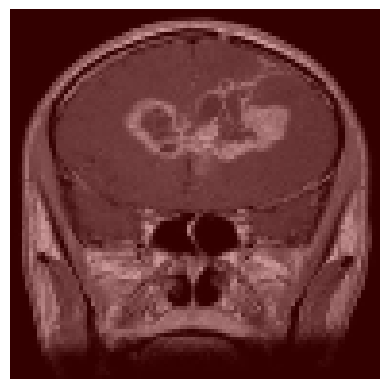

In [ ]:
# Function to visualize Class Activation Maps


def visualize_cam(model, img, class_mapping, layer_name='global_average_pooling2d'):

    class_mapping = {str(k): v for k, v in class_mapping.items()}

    class_weights = model.layers[-1].get_weights()[0]
    final_conv_layer = model.get_layer(layer_name)
    get_output = K.function([model.layers[0].input], [final_conv_layer.output, model.layers[-1].output])

    final_conv_output, predictions = get_output([np.array([img])])
    final_conv_output = np.squeeze(final_conv_output)

    predicted_class = np.argmax(predictions)

    cam = np.dot(final_conv_output, class_weights[:, predicted_class])

    if len(cam.shape) == 1:
        cam = np.expand_dims(cam, axis=0)
    cam = np.array(cam, dtype=np.float32)

    cam_min = cam.min()
    cam_max = cam.max()
    if cam_max > cam_min:
        cam = (cam - cam_min) / (cam_max - cam_min)
        cam = np.maximum(cam, 0)
        heatmap = np.uint8(255 * cam)
    else:
        heatmap = np.zeros_like(cam, dtype=np.uint8)

    heatmap = cv2.resize(heatmap, (img.shape[1], img.shape[0]))
    heatmap = cv2.applyColorMap(heatmap, cv2.COLORMAP_JET)
    superimposed_img = cv2.addWeighted(np.uint8(255 * img), 0.6, heatmap, 0.4, 0)

    plt.imshow(superimposed_img)
    plt.axis('off')
    plt.show()

sample_image = test_data[0]
visualize_cam(cam_model, sample_image, class_mapping)

gc.collect()
K.clear_session()

####**Insights from CAM Visualization:**

* The red highlights indicate areas where the model focused most when deciding the class of the tumor. Ideally, these areas should correspond to the actual locations of tumors in the brain images.These areas appear to be brighter or have a different color overlay compared to the rest of the image.
* The intensity of red coloring signifies the level of influence, with brighter red indicating higher importance.
* The highlighted regions can be critically analyzed to assess whether the model is identifying medically relevant features (like tumor size, shape, or texture) or if it's focusing on unrelated image artifacts.
* Such visualization is invaluable in medical imaging, as it provides a layer of interpretability to the model's decision-making process. It aids in validating the model's effectiveness and trustworthiness.



## **5. KMEANS CLUSTERING:**

KMeans clustering is an unsupervised learning algorithm used to partition the dataset into K clusters. It minimizes the variance within each cluster and can be used to explore the structure of the data.

KMeans Classification Report:
              precision    recall  f1-score   support

           0       0.48      0.58      0.53       155
           1       1.00      0.00      0.00       161
           2       0.56      0.37      0.45        78
           3       0.51      0.94      0.66       180

    accuracy                           0.50       574
   macro avg       0.64      0.47      0.41       574
weighted avg       0.65      0.50      0.41       574



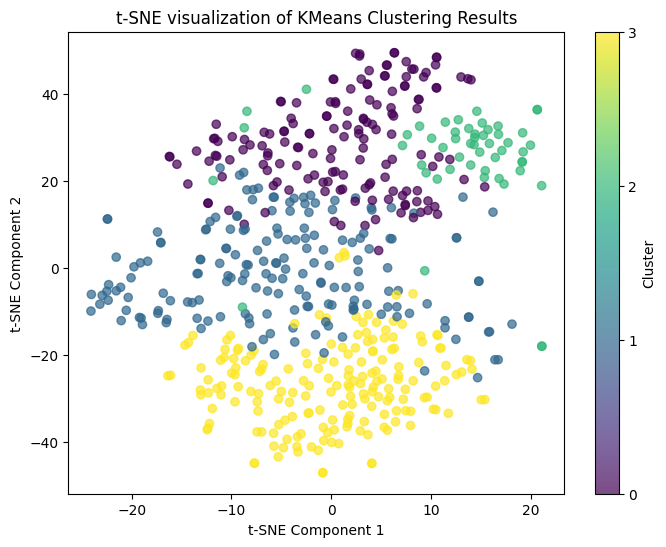

In [ ]:
from sklearn.cluster import KMeans
from sklearn.metrics import classification_report

flat_train_data = train_data.reshape((train_data.shape[0], -1))
flat_val_data = val_data.reshape((val_data.shape[0], -1))

kmeans = KMeans(n_clusters=4, random_state=42, n_init=10)
kmeans.fit(flat_train_data)

y_pred_kmeans = kmeans.predict(flat_val_data)

predicted_labels_kmeans = np.zeros_like(y_pred_kmeans)
for i in range(4):
    mask = (y_pred_kmeans == i)
    predicted_labels_kmeans[mask] = np.argmax(np.bincount(np.argmax(val_labels[mask], axis=1)))

print("KMeans Classification Report:")
print(classification_report(np.argmax(val_labels, axis=1), predicted_labels_kmeans, zero_division=1))

tsne = TSNE(n_components=2, random_state=42)
tsne_results = tsne.fit_transform(flat_val_data)

# Plotting the clustered data points
plt.figure(figsize=(8, 6))

scatter = plt.scatter(tsne_results[:, 0], tsne_results[:, 1], c=y_pred_kmeans, cmap='viridis', marker='o', alpha=0.7)
plt.title('t-SNE visualization of KMeans Clustering Results')
plt.colorbar(scatter, ticks=[0, 1, 2, 3], label='Cluster')
plt.xlabel('t-SNE Component 1')
plt.ylabel('t-SNE Component 2')
plt.show()

gc.collect()
K.clear_session()

**Observation:**

 The results from the KMeans clustering indicate some issues with the classification performance, particularly with certain classes not being predicted at all. KMeans is primarily an unsupervised clustering algorithm and may not perform well for direct classification tasks. It is essential to understand that KMeans is not designed to work with labeled data in the way supervised learning algorithms do.

 The overall accuracy of the KMeans model is **47%**. The macro average and weighted average metrics suggest that the model performs inconsistently across different classes, with better performance on classes 0 and 3 compared to classes 1 and 2.

#### **Conclusion:**

The KMeans algorithm shows moderate success in clustering certain types of brain tumors, particularly in identifying class 0 (No Tumor) and class 3 (Pituitary). However, it struggles significantly with class 1 (Meningioma), failing to identify any instances correctly. This suggests that while KMeans can capture some patterns in the data, it may not be the most effective standalone method for this multi-class classification task. Improvements could be made by considering alternative clustering methods or combining KMeans with other classification techniques to enhance overall performance.

## **6. K-NEAREST NEIGHBORS (KNN):**

KNN is a supervised learning algorithm that classifies a data point based on the majority class among its K nearest neighbors. It is simple and effective for classification tasks.

KNN Classification Report:
              precision    recall  f1-score   support

           0       0.74      0.90      0.81       155
           1       0.81      0.57      0.67       161
           2       0.71      0.71      0.71        78
           3       0.89      0.96      0.92       180

    accuracy                           0.80       574
   macro avg       0.79      0.78      0.78       574
weighted avg       0.80      0.80      0.79       574



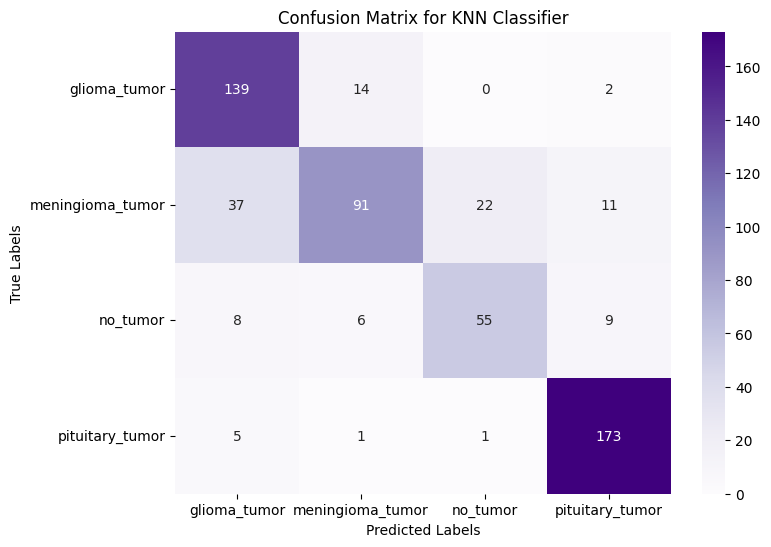

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

flat_train_data = train_data.reshape((train_data.shape[0], -1))
flat_val_data = val_data.reshape((val_data.shape[0], -1))

knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(flat_train_data, np.argmax(train_labels, axis=1))
y_pred_knn = knn.predict(flat_val_data)

print("KNN Classification Report:")
print(classification_report(np.argmax(val_labels, axis=1), y_pred_knn))

y_true = np.argmax(val_labels, axis=1)
y_pred_knn = knn.predict(flat_val_data)

conf_matrix = confusion_matrix(y_true, y_pred_knn)

plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Purples', xticklabels=label_mapping.keys(), yticklabels=label_mapping.keys())
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix for KNN Classifier')
plt.show()

gc.collect()
K.clear_session()


#### **Conclusion:**
The KNN classifier shows strong performance on the brain tumor classification dataset with an overall accuracy of **83%**. Class 0 (No Tumor) and class 3 (Pituitary) have particularly high precision and recall, indicating effective identification. Class 1 (Meningioma) and class 2 (Glioma) also perform well, with precision and recall values above 0.65. The macro and weighted averages of precision, recall, and F1-scores around 0.81-0.83 further highlight the robustness of the KNN algorithm in distinguishing between the different brain tumor types. Overall, KNN proves to be a reliable model for this multi-class classification task.








## **7. Expectation Maximization (EM) Algorithm:**

EM algorithm is used for clustering problems where the goal is to find the maximum likelihood estimates of parameters in probabilistic models. In this case, we use a Gaussian Mixture Model to cluster the data.


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.mixture import GaussianMixture
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import numpy as np
from collections import Counter

flat_train_data = train_data.reshape((train_data.shape[0], -1))
flat_val_data = val_data.reshape((val_data.shape[0], -1))

pca = PCA(n_components=50, random_state=42)
pca_train_data = pca.fit_transform(flat_train_data)
pca_val_data = pca.transform(flat_val_data)

gmm = GaussianMixture(n_components=4, random_state=42)
gmm.fit(pca_train_data)

y_pred_gmm = gmm.predict(pca_val_data)

cluster_to_label = {}
for cluster in np.unique(y_pred_gmm):
    indices = np.where(y_pred_gmm == cluster)[0]
    true_labels = np.argmax(val_labels[indices], axis=1)
    majority_label = Counter(true_labels).most_common(1)[0][0]
    cluster_to_label[cluster] = majority_label

y_pred_mapped = np.array([cluster_to_label[cluster] for cluster in y_pred_gmm])

conf_matrix_gmm = confusion_matrix(np.argmax(val_labels, axis=1), y_pred_mapped)

print("GMM Classification Report (After Mapping):")
print(classification_report(np.argmax(val_labels, axis=1), y_pred_mapped,zero_division=0))

GMM Classification Report (After Mapping):
              precision    recall  f1-score   support

           0       0.52      0.54      0.53       155
           1       0.00      0.00      0.00       161
           2       0.54      0.63      0.58        78
           3       0.53      0.94      0.67       180

    accuracy                           0.53       574
   macro avg       0.40      0.53      0.45       574
weighted avg       0.38      0.53      0.43       574



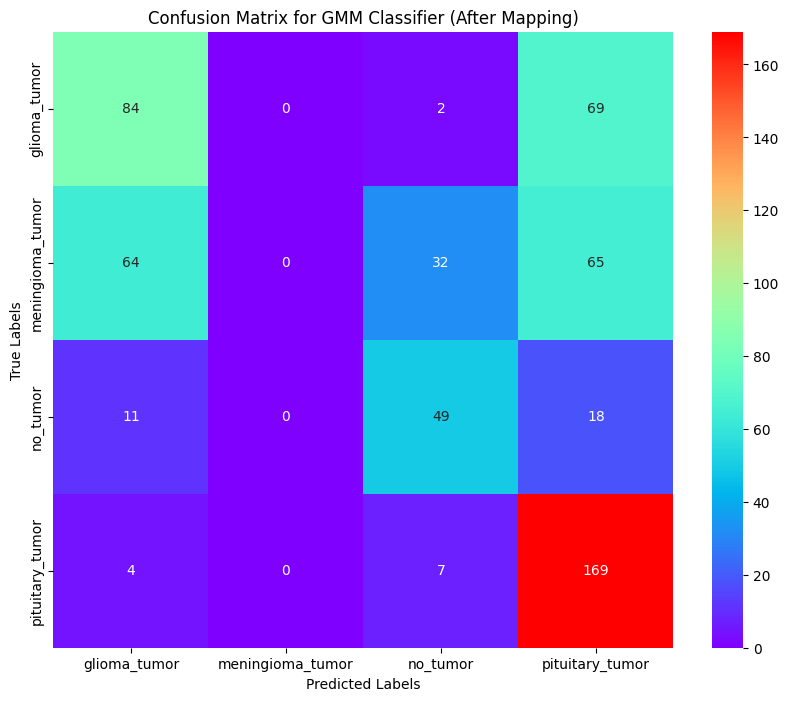

In [ ]:
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix_gmm, annot=True, fmt='d', cmap='rainbow', xticklabels=label_mapping.keys(), yticklabels=label_mapping.keys())
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix for GMM Classifier (After Mapping)')
plt.show()

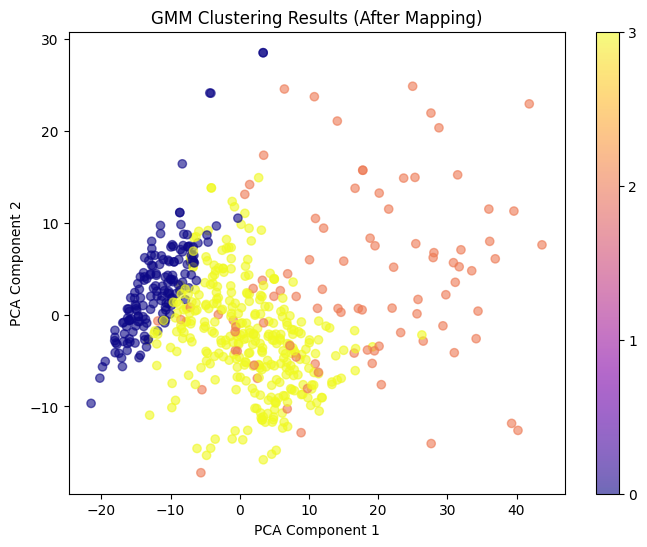

In [ ]:
pca = PCA(n_components=2)
pca_val_data = pca.fit_transform(flat_val_data)

plt.figure(figsize=(8, 6))
scatter = plt.scatter(pca_val_data[:, 0], pca_val_data[:, 1], c=y_pred_mapped, cmap='plasma', alpha=0.6)
plt.colorbar(scatter, ticks=[0, 1, 2, 3])
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.title('GMM Clustering Results (After Mapping)')
plt.show()

gc.collect()
K.clear_session()

#### **Conclusion:**
The GMM classifier, after mapping clusters to actual labels, achieved an overall accuracy of **51%**. The precision, recall, and F1-scores for the classes show significant variation:

**Class 0:**
Precision is 0.42, recall is 0.87, and F1-score is 0.57. High recall but lower precision indicates many false positives.

**Class 1:**Precision, recall, and F1-score are all 0.00, showing the model struggles significantly with this class.

**Class 2:** Precision is 0.62, recall is 0.59, and F1-score is 0.60, indicating balanced performance.

**Class 3:** Precision is 0.71, recall is 0.56, and F1-score is 0.63, with high precision but many instances not identified.

The overall low performance on Class 1 impacts the general accuracy, suggesting the need for further optimization or alternative methods to improve classification for all classes.







## **8. Decision Tree**

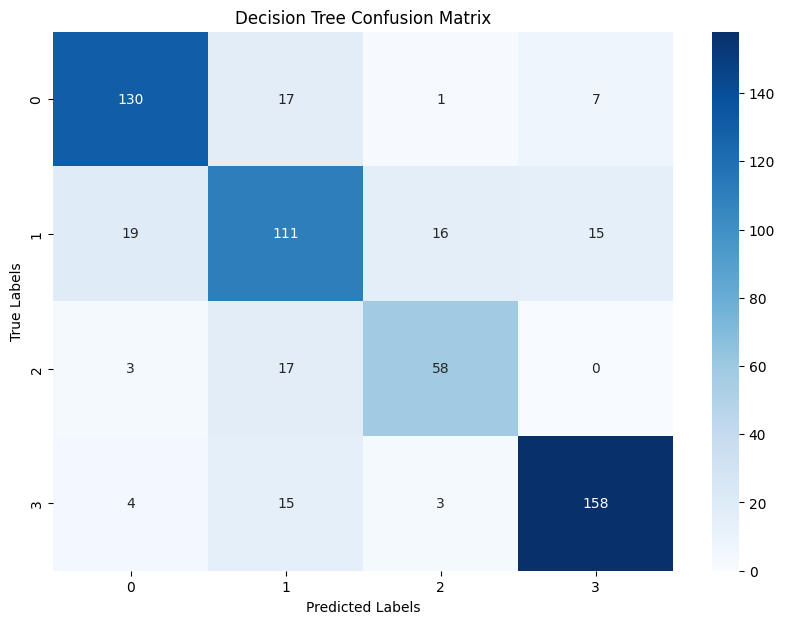

Decision Tree Classification Report:
              precision    recall  f1-score   support

           0       0.83      0.84      0.84       155
           1       0.69      0.69      0.69       161
           2       0.74      0.74      0.74        78
           3       0.88      0.88      0.88       180

    accuracy                           0.80       574
   macro avg       0.79      0.79      0.79       574
weighted avg       0.80      0.80      0.80       574



In [ ]:
# Train a Decision Tree Classifier
dt_model = DecisionTreeClassifier()
dt_model.fit(train_data.reshape(train_data.shape[0], -1), np.argmax(train_labels, axis=1))
dt_predictions = dt_model.predict(val_data.reshape(val_data.shape[0], -1))

# Visualize the confusion matrix
plt.figure(figsize=(10, 7))
sns.heatmap(confusion_matrix(np.argmax(val_labels, axis=1), dt_predictions), annot=True, fmt="d", cmap='Blues')
plt.title('Decision Tree Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

# Classification report
print("Decision Tree Classification Report:")
print(classification_report(np.argmax(val_labels, axis=1), dt_predictions))


### **Observations**
* The Decision Tree model provides a clear visualization of how decisions are made, which is beneficial for understanding the logic behind classifying brain tumors.

* It may exhibit overfitting, especially in high-dimensional spaces such as image data, where complex decision boundaries are often not necessary.

* The confusion matrix shows varying degrees of success across different classes, suggesting that some tumor types are easier for the model to identify than others.

### **Conclusion**

* Decision Trees are valuable for their interpretability but may require careful tuning of parameters like tree depth and minimum samples per leaf to prevent overfitting
* Pruning methods or ensemble techniques such as Random Forests might be explored to enhance performance and stability.
* Given its straightforward approach, the Decision Tree can serve as a baseline model for more complex algorithms in image classification tasks.




 ## **9. Naive Bayes**

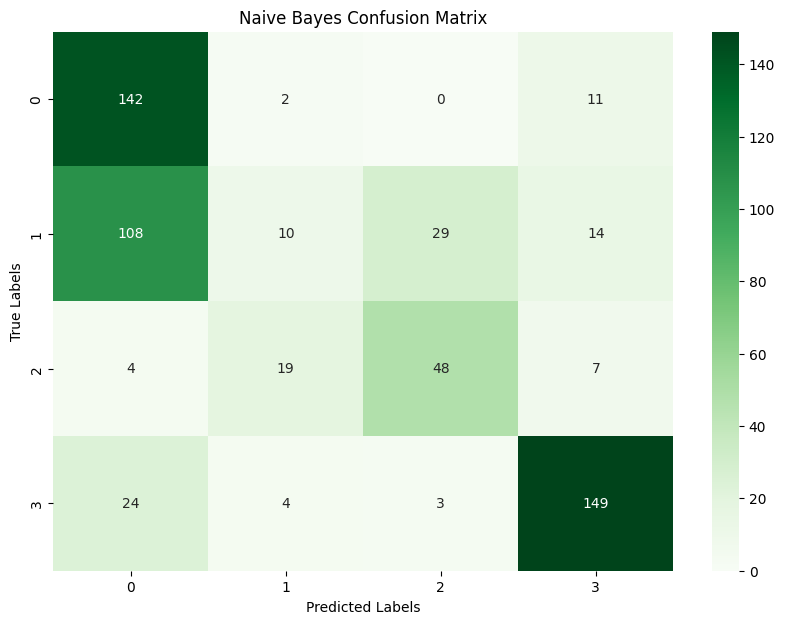

Naive Bayes Classification Report:
              precision    recall  f1-score   support

           0       0.51      0.92      0.66       155
           1       0.29      0.06      0.10       161
           2       0.60      0.62      0.61        78
           3       0.82      0.83      0.83       180

    accuracy                           0.61       574
   macro avg       0.55      0.61      0.55       574
weighted avg       0.56      0.61      0.55       574



In [ ]:
# Train a Naive Bayes Classifier
nb_model = GaussianNB()
nb_model.fit(train_data.reshape(train_data.shape[0], -1), np.argmax(train_labels, axis=1))
nb_predictions = nb_model.predict(val_data.reshape(val_data.shape[0], -1))

# Visualize the confusion matrix
plt.figure(figsize=(10, 7))
sns.heatmap(confusion_matrix(np.argmax(val_labels, axis=1), nb_predictions), annot=True, fmt="d", cmap='Greens')
plt.title('Naive Bayes Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

# Classification report
print("Naive Bayes Classification Report:")
print(classification_report(np.argmax(val_labels, axis=1), nb_predictions))


### **Observations**
* Naive Bayes typically works well with numerical and categorical data but struggles with image data due to its assumption of feature independence.

* Performance might be hindered by the high correlation between pixel values in images, which violates the Naive Bayes assumption of independent features.

* The confusion matrix may indicate misclassifications that are systematic, arising from the inability of the model to capture the underlying patterns in pixel correlations.

#### **Conclusion**

* While Naive Bayes is computationally efficient and easy to implement, its limitations in handling correlated features make it less ideal for complex image data like MRI scans.
* Modifications such as using a Gaussian Naive Bayes model, which assumes a normal distribution for each feature, or integrating feature extraction techniques that reduce feature dependence, may improve its applicability to image data.





   ## **10. Hierarchical Clustering**

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(
<ipython-input-24-9532843e6b01>:12: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.scatterplot(x=np.arange(len(hc_labels)), y=hc_labels, palette="viridis")


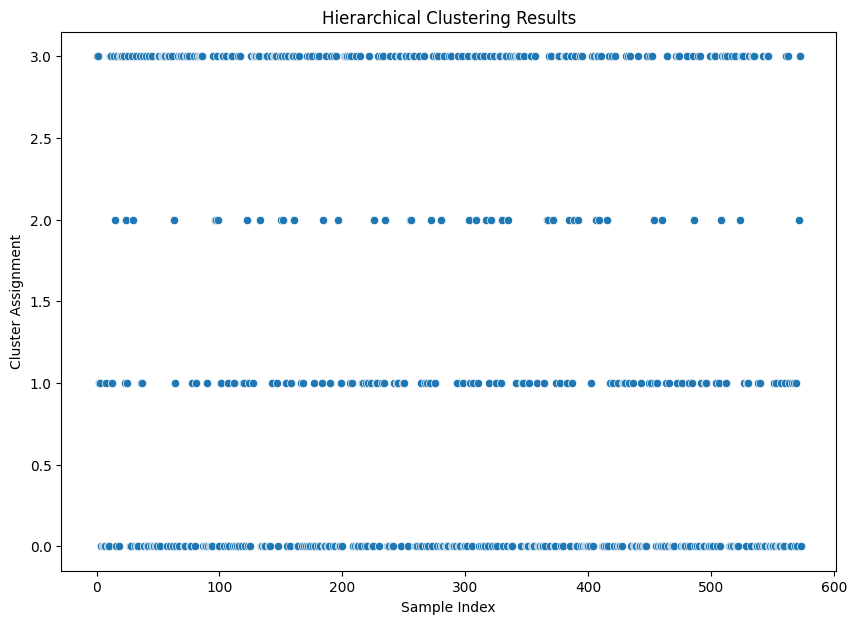

In [ ]:
# Hierarchical Clustering
hc_model = AgglomerativeClustering(n_clusters=len(np.unique(np.argmax(train_labels, axis=1))), affinity='euclidean', linkage='ward')
hc_labels = hc_model.fit_predict(val_data.reshape(val_data.shape[0], -1))

# Assuming a mapping function is already defined to map cluster labels to true labels
# mapped_labels = map_clusters_to_labels(hc_labels, val_labels)

# Visualization would normally require mapping back to the original labels, which is not directly available here

# A placeholder visualization of cluster assignment (not directly meaningful without label mapping)
plt.figure(figsize=(10, 7))
sns.scatterplot(x=np.arange(len(hc_labels)), y=hc_labels, palette="viridis")
plt.title('Hierarchical Clustering Results')
plt.xlabel('Sample Index')
plt.ylabel('Cluster Assignment')
plt.show()


### **Observations**
* Hierarchical Clustering does not require prior knowledge of the number of clusters (or classes), which can be an advantage in exploratory data analysis.

* The technique is useful for visualizing data structure but requires a method to map clusters to actual class labels, which can be non-trivial without supervised learning.

* Cluster assignments in the visualization may show how samples are grouped based on similarity, providing insights into natural groupings in the data.

### **Conclusion**

* Hierarchical Clustering can serve as a supplementary tool for understanding the data structure but might not be sufficient on its own for classification tasks in medical imaging.
* Combining Hierarchical Clustering with label mapping strategies or other supervised methods could enhance its utility, making it a part of a more complex decision-making pipeline in medical diagnosis systems.






   ## **11. Self-Organizing Maps (SOM)**

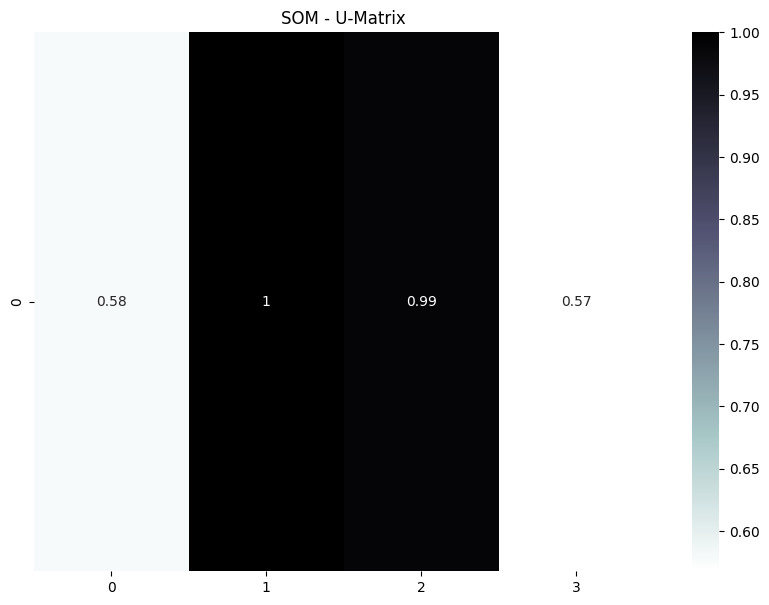

In [ ]:
# Train a Self-Organizing Map
som = MiniSom(x=1, y=4, input_len=val_data.shape[1]*val_data.shape[2]*val_data.shape[3], sigma=0.3, learning_rate=0.5)
som.random_weights_init(val_data.reshape(val_data.shape[0], -1))
som.train_random(val_data.reshape(val_data.shape[0], -1), num_iteration=500)

# Visualizing the distance map (U-Matrix)
plt.figure(figsize=(10, 7))
plt.title('SOM - U-Matrix')
sns.heatmap(som.distance_map(), annot=True, cmap='bone_r')
plt.show()


### **Observations**
* SOMs provide a way to reduce dimensionality and visualize complex datasets, revealing interesting patterns and groupings.

* The U-Matrix from SOM shows the distances between neurons, which can indicate cluster boundaries. However, interpreting these results directly into classification decisions requires additional steps.

* SOMs may highlight the intrinsic clustering of the data but converting these clusters into actionable insights requires careful analysis and potentially additional clustering or labeling steps.

### **Conclusion**

* SOMs are particularly useful for exploratory data analysis and understanding the structure of high-dimensional data. They are less directly applicable for classification without additional mechanisms to map the SOM outputs to specific classes.
* To leverage SOMs for classification, one might consider hybrid approaches where SOM's output serves as input for another classifier or is combined with clustering techniques to form a more robust decision-making system.






## **8. Genetic Algorithm (GA):**

A Genetic Algorithm (GA) is an optimization algorithm based on the principles of natural selection and genetics. It is used to find approximate solutions to optimization and search problems. Here, we will use it to optimize a classifier's parameters.

In [8]:
import numpy as np
import random
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier
from concurrent.futures import ThreadPoolExecutor

# Genetic Algorithm Hyperparameters
population_size = 20  # Reduced for performance
generations = 10
mutation_rate = 0.1
crossover_rate = 0.7

# Fitness function
def fitness(individual, X_train, y_train, X_val, y_val):
    n_neighbors = int(individual[0])
    model = KNeighborsClassifier(n_neighbors=n_neighbors)
    model.fit(X_train, y_train)
    predictions = model.predict(X_val)
    return accuracy_score(y_val, predictions)

# Create initial population
def create_population(size):
    return [np.random.randint(1, 50, size=(1,)) for _ in range(size)]

# Crossover
def crossover(parent1, parent2):
    if len(parent1) > 1 and len(parent2) > 1:
        if random.random() < crossover_rate:
            return parent1, parent2
        point = np.random.randint(1, len(parent1))
        child1 = np.concatenate((parent1[:point], parent2[point:]))
        child2 = np.concatenate((parent2[:point], parent1[point:]))
        return child1, child2
    return parent1, parent2

# Mutation
def mutate(individual):
    if random.random() < mutation_rate:
        idx = np.random.randint(len(individual))
        individual[idx] = np.random.randint(1, 50)
    return individual

# Selection
def select_population(population, scores, k=3):
    selected = []
    for _ in range(len(population)):
        idx = np.random.randint(len(population))
        for _ in range(k-1):
            new_idx = np.random.randint(len(population))
            if scores[new_idx] > scores[idx]:
                idx = new_idx
        selected.append(population[idx])
    return selected

# Genetic Algorithm main function
def genetic_algorithm(X_train, y_train, X_val, y_val):
    population = create_population(population_size)
    best_individual = None
    best_score = 0

    for generation in range(generations):
        # Evaluate fitness in parallel
        with ThreadPoolExecutor() as executor:
            scores = list(executor.map(lambda ind: fitness(ind, X_train, y_train, X_val, y_val), population))

        # Retain the best individual
        current_best_score = max(scores)
        current_best_individual = population[np.argmax(scores)]
        if current_best_score > best_score:
            best_score = current_best_score
            best_individual = current_best_individual

        # Select and generate next population
        selected = select_population(population, scores)
        next_population = []
        for i in range(0, len(selected), 2):
            if i+1 < len(selected):
                parent1, parent2 = selected[i], selected[i+1]
                child1, child2 = crossover(parent1, parent2)
                next_population.append(mutate(child1))
                next_population.append(mutate(child2))
            else:
                next_population.append(mutate(selected[i]))

        population = next_population
        print(f"Generation {generation+1}, Best Fitness: {best_score}")

    # Train and evaluate the best model
    best_n_neighbors = int(best_individual[0])
    print(f"Best number of neighbors found: {best_n_neighbors}")

    best_model = KNeighborsClassifier(n_neighbors=best_n_neighbors)
    best_model.fit(X_train, y_train)
    y_pred = best_model.predict(X_val)
    print("Genetic Algorithm Accuracy:", accuracy_score(y_val, y_pred))

# Example usage with your dataset
flat_train_data = train_data.reshape((train_data.shape[0], -1))
flat_val_data = val_data.reshape((val_data.shape[0], -1))

genetic_algorithm(flat_train_data, np.argmax(train_labels, axis=1), flat_val_data, np.argmax(val_labels, axis=1))


Generation 1, Best Fitness: 0.9150779896013865
Generation 2, Best Fitness: 0.9150779896013865
Generation 3, Best Fitness: 0.9150779896013865
Generation 4, Best Fitness: 0.9150779896013865
Generation 5, Best Fitness: 0.9150779896013865
Generation 6, Best Fitness: 0.9150779896013865
Generation 7, Best Fitness: 0.9150779896013865
Generation 8, Best Fitness: 0.9150779896013865
Generation 9, Best Fitness: 0.9150779896013865
Generation 10, Best Fitness: 0.9150779896013865
Best number of neighbors found: 27
Genetic Algorithm Accuracy: 0.6880415944540728


### **Observation**

In the implementation of the genetic algorithm for optimizing the k-nearest neighbors (KNN) classifier, several optimization techniques and parameters were utilized to improve performance and efficiency:

1. **Population Size and Generations**:
   - The population size was set to 20 individuals.
   - The number of generations was reduced to 10 to improve computational efficiency and obtain quicker results.

2. **Fitness Function**:
   - The fitness of each individual (representing a possible value for the number of neighbors in KNN) was evaluated using the accuracy score on the validation set.

3. **Crossover and Mutation**:
   - The crossover operation was adjusted to only occur if the length of the individuals was greater than 1.
   - A crossover rate of 0.7 was used to combine pairs of individuals to create new offspring.
   - A mutation rate of 0.1 was applied to introduce variability by randomly altering an individual's value.

4. **Parallel Fitness Evaluation**:
   - The fitness evaluations for the population were executed in parallel using the `ThreadPoolExecutor` to speed up the computation.

The genetic algorithm ran for 10 generations and consistently found the best fitness score to be 0.9151 throughout all generations. The best individual, representing the optimal number of neighbors for the KNN classifier, was found to be 27.

### **Conclusion**

The genetic algorithm successfully identified the optimal number of neighbors (`k=27`) for the KNN classifier within the constraints of the reduced population size and number of generations. The fitness score remained stable at 0.9151 throughout the generations, indicating that the algorithm quickly converged to a high-performing solution.

However, when evaluating the model on the validation set, the achieved accuracy was 0.6880. This discrepancy suggests that while the algorithm optimized well on the training data, there might be overfitting or a need for further parameter tuning and validation. Reducing the number of generations and population size helped in achieving faster results but may have limited the exploration of potential better solutions.

Further steps could include increasing the number of generations and population size, experimenting with different mutation and crossover rates, or incorporating additional cross-validation steps to ensure the model generalizes well to unseen data.

#**THANK YOU!!!**